In [95]:
from __future__ import print_function
import keras 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import os 
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import seaborn as sys
import pandas as pd 
from keras.models import load_model

In [2]:
num_class = 5
r,c = (48,48)
batch_size = 32

In [3]:
train_data_dir = 'train'
valid_data_dir = 'validation'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  shear_range=0.3,
                                  zoom_range=0.3,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  horizontal_flip=True,
                                  fill_mode="nearest")

valid_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_gen = train_datagen.flow_from_directory(train_data_dir,
                                             color_mode="grayscale",
                                             target_size=(r,c),
                                             batch_size=batch_size,
                                             class_mode="categorical",
                                             shuffle=True)

valid_gen = valid_datagen.flow_from_directory(valid_data_dir,
                                             color_mode="grayscale",
                                             target_size=(r,c),
                                             batch_size=batch_size,
                                             class_mode="categorical",
                                             shuffle=True)

Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [6]:
m = Sequential()
m.add(Conv2D(32,(3,3),padding="same",kernel_initializer="he_normal",input_shape=(r,c,1)))
m.add(Activation("elu"))
m.add(BatchNormalization())
m.add(Conv2D(32,(3,3),padding="same",kernel_initializer="he_normal",input_shape=(r,c,1)))
m.add(Activation("elu"))
m.add(BatchNormalization())
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Dropout(0.2))

m.add(Conv2D(64,(3,3),padding="same",kernel_initializer="he_normal"))
m.add(Activation("elu"))
m.add(BatchNormalization())
m.add(Conv2D(64,(3,3),padding="same",kernel_initializer="he_normal"))
m.add(Activation("elu"))
m.add(BatchNormalization())
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Dropout(0.2))

m.add(Conv2D(128,(3,3),padding="same",kernel_initializer="he_normal"))
m.add(Activation("elu"))
m.add(BatchNormalization())
m.add(Conv2D(128,(3,3),padding="same",kernel_initializer="he_normal"))
m.add(Activation("elu"))
m.add(BatchNormalization())
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Dropout(0.2))

m.add(Conv2D(256,(3,3),padding="same",kernel_initializer="he_normal"))
m.add(Activation("elu"))
m.add(BatchNormalization())
m.add(Conv2D(256,(3,3),padding="same",kernel_initializer="he_normal"))
m.add(Activation("elu"))
m.add(BatchNormalization())
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Dropout(0.2))

m.add(Flatten())
m.add(Dense(64, kernel_initializer="he_normal"))
m.add(Activation("elu"))
m.add(BatchNormalization())
m.add(Dropout(0.5))

m.add(Dense(num_class, kernel_initializer="he_normal"))
m.add(Activation("softmax"))


In [7]:
m.compile(loss="categorical_crossentropy",
         optimizer=keras.optimizers.Adam(lr=0.001),
         metrics=["accuracy"])
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)       

In [8]:
num_train = 24256
num_valid = 3006
epochs = 70
his = m.fit_generator(train_gen,
                     steps_per_epoch = num_train//batch_size,
                     epochs = epochs,
                     validation_data = valid_gen,
                     validation_steps = num_valid//batch_size)

Epoch 1/70
758/758 [==============================] - 124s 164ms/step - loss: 1.8021 - accuracy: 0.2464 - val_loss: 1.4976 - val_accuracy: 0.2863
Epoch 2/70
758/758 [==============================] - 30s 40ms/step - loss: 1.5694 - accuracy: 0.2943 - val_loss: 1.5157 - val_accuracy: 0.3389
Epoch 3/70
758/758 [==============================] - 30s 39ms/step - loss: 1.5318 - accuracy: 0.3167 - val_loss: 1.3245 - val_accuracy: 0.3477
Epoch 4/70
758/758 [==============================] - 30s 40ms/step - loss: 1.4569 - accuracy: 0.3632 - val_loss: 1.4562 - val_accuracy: 0.4250
Epoch 5/70
758/758 [==============================] - 30s 40ms/step - loss: 1.3364 - accuracy: 0.4356 - val_loss: 1.7862 - val_accuracy: 0.4963
Epoch 6/70
758/758 [==============================] - 30s 39ms/step - loss: 1.2485 - accuracy: 0.4854 - val_loss: 0.9766 - val_accuracy: 0.5094
Epoch 7/70
758/758 [==============================] - 30s 40ms/step - loss: 1.1818 - accuracy: 0.5177 - val_loss: 1.3175 - val_accurac

758/758 [==============================] - 30s 39ms/step - loss: 0.8472 - accuracy: 0.6783 - val_loss: 0.7300 - val_accuracy: 0.6342
Epoch 58/70
758/758 [==============================] - 30s 39ms/step - loss: 0.8511 - accuracy: 0.6769 - val_loss: 0.8276 - val_accuracy: 0.6258
Epoch 59/70
758/758 [==============================] - 30s 40ms/step - loss: 0.8374 - accuracy: 0.6811 - val_loss: 1.5525 - val_accuracy: 0.6288
Epoch 60/70
758/758 [==============================] - 30s 40ms/step - loss: 0.8395 - accuracy: 0.6807 - val_loss: 1.3354 - val_accuracy: 0.6325
Epoch 61/70
758/758 [==============================] - 32s 42ms/step - loss: 0.8408 - accuracy: 0.6773 - val_loss: 1.1299 - val_accuracy: 0.6466
Epoch 62/70
758/758 [==============================] - 30s 40ms/step - loss: 0.8435 - accuracy: 0.6834 - val_loss: 1.0246 - val_accuracy: 0.6483
Epoch 63/70
758/758 [==============================] - 30s 40ms/step - loss: 0.8369 - accuracy: 0.6793 - val_loss: 1.0123 - val_accuracy: 0.65

In [9]:
m.save_weights("vgg_emotion_model.h5")

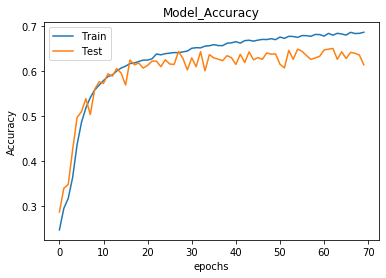

In [59]:
plt.plot(his.history["accuracy"])
plt.plot(his.history["val_accuracy"])
plt.title("Model_Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend(['Train',"Test"],loc="upper left")
plt.show()

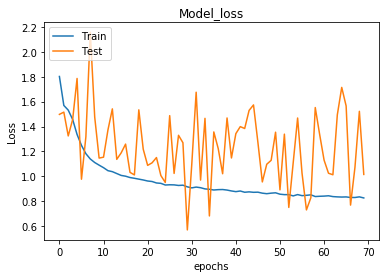

In [60]:
plt.plot(his.history["loss"])
plt.plot(his.history["val_loss"])
plt.title("Model_loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend(['Train',"Test"],loc="upper left")
plt.show()

In [29]:
y_pred = m.predict_generator(valid_gen,num_valid//batch_size+1)

In [30]:
y_pred = np.argmax(y_pred,axis=1)

In [35]:
valid_gen.classes

array([0, 0, 0, ..., 4, 4, 4])

In [33]:
print("Confution matrix")
print(confusion_matrix(valid_gen.classes,y_pred))

Confution matrix
[[ 79 172  83  90  67]
 [150 283 165 159 122]
 [112 216 116  91  91]
 [111 188 103  98  94]
 [ 81 144  67  70  54]]


In [76]:
print("classification Repot")
#print(classification_report(valid_gen.classes,y_pred,target_names=target_names))
print(classification_report(valid_gen.classes,y_pred))

classification Repot
              precision    recall  f1-score   support

           0       0.15      0.16      0.15       491
           1       0.28      0.32      0.30       879
           2       0.22      0.19      0.20       626
           3       0.19      0.16      0.18       594
           4       0.13      0.13      0.13       416

    accuracy                           0.21      3006
   macro avg       0.19      0.19      0.19      3006
weighted avg       0.21      0.21      0.21      3006



In [51]:
all_labels = ["0","1","2","3","4"]

In [73]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(all_labels): # all_labels: no of the labels
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        auc_score = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

    return roc_auc_score(y_test, y_pred, average=average)
    

94/94 [==============================] - 2s 19ms/step


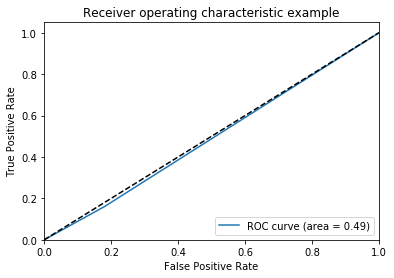

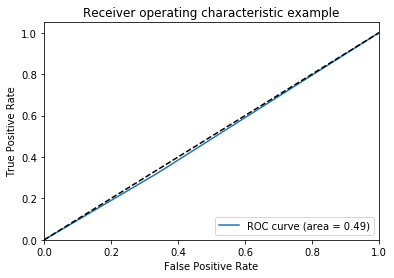

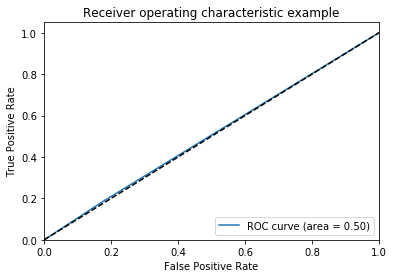

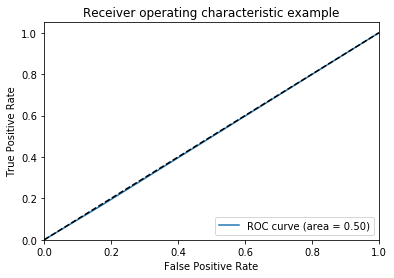

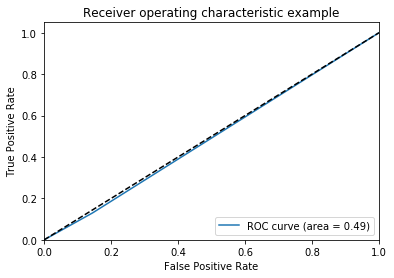

0.49539102231766996

In [74]:
valid_gen.reset()
y_pred = m.predict_generator(valid_gen,verbose=True)
y_pred = np.argmax(y_pred,axis=1)
multiclass_roc_auc_score(valid_gen.classes,y_pred)


In [80]:
con_mat = tf.math.confusion_matrix(labels=valid_gen.classes, predictions=y_pred).numpy()

In [82]:
print(con_mat)

[[ 79 172  83  90  67]
 [150 283 165 159 122]
 [112 216 116  91  91]
 [111 188 103  98  94]
 [ 81 144  67  70  54]]


In [83]:
cf_mx_norm = np.around(con_mat.astype("float")/con_mat.sum(axis=1)[:,np.newaxis],decimals=2)

In [86]:
cf_mx_norm_df = pd.DataFrame(cf_mx_norm,index=all_labels,columns=all_labels)
cf_mx_norm_df

,0,1,2,3,4
0,0.16,0.35,0.17,0.18,0.14
1,0.17,0.32,0.19,0.18,0.14
2,0.18,0.35,0.19,0.15,0.15
3,0.19,0.32,0.17,0.16,0.16
4,0.19,0.35,0.16,0.17,0.13


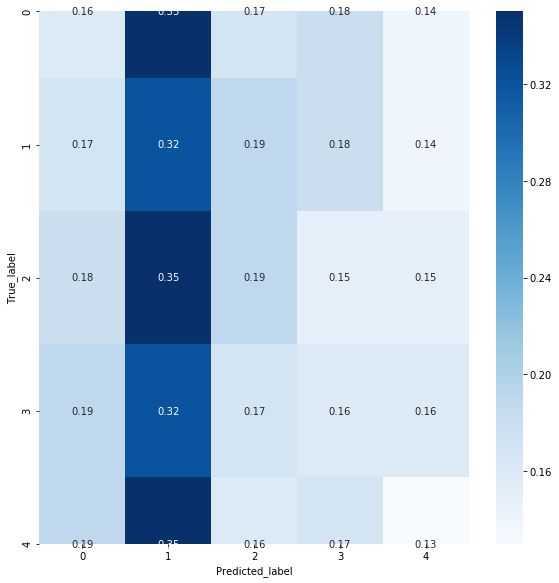

In [88]:
figure = plt.figure(figsize=(8,8))
sys.heatmap(cf_mx_norm_df,annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True_label")
plt.xlabel("Predicted_label")
plt.show()

In [94]:
m.save('vgg_emotion_model.h5')  # creates a HDF5 file 'my_model.h5'
del m

In [93]:

m = load_model('my_model.h5')